In [1]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 3.4 MB/s eta 0:00:00


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = "85a36e55bd394931a034eecef10af960"
client_secret = "dc56440bf1ec4197896b38296c1a0883"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
import requests
import pandas as pd
import time

In [3]:
# Getting Access
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [4]:
# Saving header information for access
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [5]:
# Data Extraction

# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# your artist ID - Taylor Swift
artist_id = '06HL4z0CvFAxyc27GXpf02'

# extract all albums
r = requests.get(BASE_URL + 'artists/' + artist_id + '/albums',
                 headers=headers,
                 params={'include_groups': 'album', 'limit': 50})
d = r.json()

In [6]:
# Extract audio feature information for each track from all albums

audiofeature = []   # will hold all audio feature info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in d['items']:
    album_name = album['name']

    albums.append(album_name.upper()) # use upper() to standardize

    # this takes a few seconds so let's keep track of progress
    print(album_name)

    # pull all tracks from this album
    r = requests.get(BASE_URL + 'albums/' + album['id'] + '/tracks',
        headers=headers)
    tracks = r.json()['items']

    for track in tracks:
        # get audio features (key, liveness, danceability, ...)
        f = requests.get(BASE_URL + 'audio-features/' + track['id'],
            headers=headers)
        f = f.json()

        # combine with album info
        f.update({
            'track_name': track['name'],
            'album_name': album_name,
            'release_date': album['release_date'],
            'album_id': album['id']
        })

        audiofeature.append(f)

1989 (Taylor's Version) [Deluxe]
1989 (Taylor's Version)
Speak Now (Taylor's Version)
Midnights (The Til Dawn Edition)
Midnights (3am Edition)
Midnights
Red (Taylor's Version)
Fearless (Taylor's Version)
evermore (deluxe version)
evermore
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]
folklore (deluxe version)
folklore
Lover
reputation
reputation Stadium Tour Surprise Song Playlist
1989 (Deluxe Edition)
1989
Red (Deluxe Edition)
Red
Speak Now World Tour Live
Speak Now (Deluxe Edition)
Speak Now
Fearless Platinum Edition
Fearless
Live From Clear Channel Stripped 2008
Taylor Swift


In [7]:
# Load all the extracted data into a dataframe and preview dataframe.
df2 = pd.DataFrame(audiofeature)
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,release_date,album_id
0,0.757,0.610,7,-4.840,1,0.0327,0.009420,0.000037,0.3670,0.685,...,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,https://api.spotify.com/v1/tracks/4WUepByoeqce...,https://api.spotify.com/v1/audio-analysis/4WUe...,212600,4,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0
1,0.733,0.733,0,-5.376,1,0.0670,0.088500,0.000000,0.1680,0.701,...,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,https://api.spotify.com/v1/tracks/0108kcWLnn2H...,https://api.spotify.com/v1/audio-analysis/0108...,231833,4,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0
2,0.511,0.822,11,-4.785,0,0.0397,0.000421,0.019700,0.0899,0.305,...,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,https://api.spotify.com/v1/tracks/3Vpk1hfMAQme...,https://api.spotify.com/v1/audio-analysis/3Vpk...,231000,4,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0
3,0.545,0.885,0,-5.968,1,0.0447,0.000537,0.000056,0.3850,0.206,...,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,https://api.spotify.com/v1/tracks/1OcSfkeCg9hR...,https://api.spotify.com/v1/audio-analysis/1OcS...,235800,4,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0
4,0.588,0.721,0,-5.579,1,0.0317,0.000656,0.000000,0.1310,0.520,...,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,https://api.spotify.com/v1/tracks/2k0ZEeAqzvYM...,https://api.spotify.com/v1/audio-analysis/2k0Z...,193289,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0


In [8]:
# For Audio Feature dataset
# 1. Check data types
dataTypes2 = df2.dtypes
print(len(df2))
print(dataTypes2)

#all field's data type seem fine, except release_date.
#It should be changed to date type. Will change once reorgansing the dataframe.

464
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
track_name           object
album_name           object
release_date         object
album_id             object
dtype: object


In [9]:
# 2. checking for Null values
df2.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
track_name          0
album_name          0
release_date        0
album_id            0
dtype: int64

Filtrar para ter apenas os albuns originais

In [10]:
df2 = df2[df2.album_name.isin(["Taylor Swift","Fearless","Speak Now","Red","1989","reputation","Lover","folklore","evermore","Midnights"])]

In [11]:
# 3. reorganise and drop unnecessary fields
df_original = df2
df2 = df2[['track_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df2.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
100,Lavender Haze,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,0.157,0.0976,96.985
101,Maroon,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,0.101,0.0374,108.075
102,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.142,0.5330,97.008
103,Snow On The Beach (feat. Lana Del Rey),0.663,0.319,9,-13.481,1,0.0375,0.6900,0.000993,0.117,0.1930,109.957
104,"You're On Your Own, Kid",0.696,0.396,2,-10.289,1,0.0656,0.4010,0.000005,0.125,0.3800,120.041


In [12]:
# 4. check for duplicates
df2.duplicated().sum()

0

Upload base com popularidade

In [13]:
# 1. Extract all tracks and track information from all albums

trackinfo = []   # will hold all track info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in d['items']:
    album_name = album['name']

    albums.append(album_name.upper()) # use upper() to standardize

    # this takes a few seconds so let's keep track of progress
    print(album_name)

    # pull all tracks from this album
    r = requests.get(BASE_URL + 'albums/' + album['id'] + '/tracks',
        headers=headers)
    tracks = r.json()['items']

    for track in tracks:
        # get track information
        f = requests.get(BASE_URL + 'tracks/' + track['id'],
            headers=headers)
        f = f.json()

     # combine with album info
        f.update({
            'album_name': album_name,
            'release_date': album['release_date'],
            'album_id': album['id']
        })

        trackinfo.append(f)

1989 (Taylor's Version) [Deluxe]
1989 (Taylor's Version)
Speak Now (Taylor's Version)
Midnights (The Til Dawn Edition)
Midnights (3am Edition)
Midnights
Red (Taylor's Version)
Fearless (Taylor's Version)
evermore (deluxe version)
evermore
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]
folklore (deluxe version)
folklore
Lover
reputation
reputation Stadium Tour Surprise Song Playlist
1989 (Deluxe Edition)
1989
Red (Deluxe Edition)
Red
Speak Now World Tour Live
Speak Now (Deluxe Edition)
Speak Now
Fearless Platinum Edition
Fearless
Live From Clear Channel Stripped 2008
Taylor Swift


In [14]:
# Load all the extracted data into a dataframe and preview dataframe.
df_pop = pd.DataFrame(trackinfo)
df_pop.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri,album_name,release_date,album_id
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,212600,False,{'isrc': 'USUG12306672'},{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4WUepByoeqce...,4WUepByoeqcedHoYhSNHRt,False,Welcome To New York (Taylor's Version),72,None,1,track,spotify:track:4WUepByoeqcedHoYhSNHRt,1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,231833,False,{'isrc': 'USUG12306673'},{'spotify': 'https://open.spotify.com/track/01...,https://api.spotify.com/v1/tracks/0108kcWLnn2H...,0108kcWLnn2HlH2kedi1gn,False,Blank Space (Taylor's Version),73,None,2,track,spotify:track:0108kcWLnn2HlH2kedi1gn,1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,231000,False,{'isrc': 'USUG12306674'},{'spotify': 'https://open.spotify.com/track/3V...,https://api.spotify.com/v1/tracks/3Vpk1hfMAQme...,3Vpk1hfMAQme8VJ0SNRSkd,False,Style (Taylor's Version),75,None,3,track,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,235800,False,{'isrc': 'USUG12306675'},{'spotify': 'https://open.spotify.com/track/1O...,https://api.spotify.com/v1/tracks/1OcSfkeCg9hR...,1OcSfkeCg9hRC2sFKB4IMJ,False,Out Of The Woods (Taylor's Version),73,None,4,track,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193289,False,{'isrc': 'USUG12306676'},{'spotify': 'https://open.spotify.com/track/2k...,https://api.spotify.com/v1/tracks/2k0ZEeAqzvYM...,2k0ZEeAqzvYMcx9Qt5aClQ,False,All You Had To Do Was Stay (Taylor's Version),72,None,5,track,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,1989 (Taylor's Version) [Deluxe],2023-10-27,1o59UpKw81iHR0HPiSkJR0


In [15]:
df_pop = df_pop[df_pop.album_name.isin(["Taylor Swift","Fearless","Speak Now","Red","1989","reputation","Lover","folklore","evermore","Midnights"])]

In [16]:
df_pop= df_pop[['name','popularity']]
df_pop

,name,popularity
100,Lavender Haze,84
101,Maroon,79
102,Anti-Hero,92
103,Snow On The Beach (feat. Lana Del Rey),77
104,"You're On Your Own, Kid",85
...,...,...
459,Our Song,75
460,I'm Only Me When I'm With You,61
461,Invisible,58
462,A Perfectly Good Heart,57


In [17]:
df_pop= df_pop.rename(columns={'name':'track_name'})

Upload da segunda base de dados - letra das músicas com var de sentimentos - roBERTa

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
df = pd.read_excel("drive/My Drive/Colab Notebooks/TCC/Taylor_Swift_Genius_Data.xlsx")

In [20]:
pip install transformers

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
sia = SentimentIntensityAnalyzer()

In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Lyrics']
        myid = row['Index']
        roberta_result = polarity_scores_roberta(text)
        both = {**roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/195 [00:00<?, ?it/s]

In [28]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Index'})
results_df = results_df.merge(df, how='left')

Lexical reachness

In [29]:
df_lex = pd.read_excel("drive/My Drive/Colab Notebooks/TCC/Taylor_Swift_Genius_Data.xlsx")

In [30]:
#lowercase & remove punctuation
df_lex['clean_lyric'] = df_lex['Lyrics'].str.lower()
df_lex['clean_lyric'] = df_lex['clean_lyric'].str.replace('[^\w\s]','',regex=True)

In [31]:
#remove stopwords (see the next cell for illustration)
#create a small list of English stop words, feel free to edit this list
stop = ['the', 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been']

#there are three steps in one here - explained below
#we make a list of words with `.split()`
#then we remove all the words in our list
#then we join the words back together into a string
df_lex['clean_lyric'] = df_lex['clean_lyric'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [32]:
def get_features(df3):
    df_lex['clean_lyric'] = df_lex['clean_lyric'].apply(lambda x:str(x))
    df_lex['total_length'] = df_lex['clean_lyric'].apply(len)
    df_lex['num_words'] = df_lex['clean_lyric'].str.count('\S+')
    df_lex['num_unique_words'] = df_lex['clean_lyric'].apply(lambda comment: len(set(w for w in comment.split())))
    return df3

In [33]:
df_lex = get_features(df_lex)
df_lex=df_lex.groupby(by=['Album','Song Name','clean_lyric'],as_index=False).sum()
df_lex['lexical_reachness'] = df_lex['num_unique_words'] / df_lex['num_words']

<ipython-input-33-6f4a4152a327>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_lex=df_lex.groupby(by=['Album','Song Name','clean_lyric'],as_index=False).sum()


Merge das 4 bases - todas as variáveis juntas pro PCA

In [34]:
results_df = results_df.rename(columns={'Song Name': 'track_name'})
df_frequencia = df_lex.rename(columns={'Song Name': 'track_name'})
df_final =pd.merge(pd.merge(pd.merge(df_frequencia,results_df,on='track_name'),df2,on='track_name'),df_pop,on='track_name')
df_final= df_final.groupby(['track_name']).min()
df_final.head()

,Album_x,clean_lyric,Index_x,total_length,num_words,num_unique_words,lexical_reachness,Index_y,roberta_neg,roberta_neu,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
track_name,,,,,,,,,,,,,,,,,,,,,
...Ready For It?,Reputation,in middle of night in my dreams you should see...,74,789,172,51,0.296512,74,0.034678,0.678398,...,2,-6.509,1,0.1360,0.05270,0.0000,0.1970,0.417,160.015,85
22,Red,but ill bet you want everything will alright i...,57,960,181,48,0.265193,57,0.091133,0.521151,...,7,-6.561,1,0.0378,0.00215,0.0013,0.0752,0.668,104.007,53
A Perfectly Good Heart,Taylor Swift,why would you wanna break perfectly good heart...,1,1104,213,66,0.309859,1,0.508937,0.407278,...,4,-5.726,1,0.0365,0.00349,0.0000,0.1280,0.268,156.092,57
A Place in this World,Taylor Swift,i dont know what i want so dont ask me cause i...,7,923,202,81,0.400990,7,0.144631,0.600395,...,9,-2.881,1,0.0324,0.05100,0.0000,0.3200,0.428,115.028,60
Afterglow,Lover,i blew things out of proportion now youre blue...,101,1555,348,114,0.327586,101,0.372470,0.530657,...,9,-8.746,1,0.0344,0.13000,0.0000,0.1140,0.399,111.011,81


In [35]:
# 2. checking for Null values
df_final.isna().sum()

Album_x              0
clean_lyric          0
Index_x              0
total_length         0
num_words            0
num_unique_words     0
lexical_reachness    0
Index_y              0
roberta_neg          0
roberta_neu          0
roberta_pos          0
Album_y              0
Lyrics               0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
popularity           0
dtype: int64

In [36]:
df_var= df_final.reset_index()
df_var=df_var[['track_name','Album_x','lexical_reachness','danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','roberta_neg','roberta_neu','roberta_pos','popularity']]

In [37]:
df_final_copia = df_final

In [38]:
df_final = df_final[['lexical_reachness','danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','roberta_neg','roberta_neu','roberta_pos','popularity']]

Análise exploratória

In [39]:
# criando relação de ID
album_id= {'album_name': ["Taylor Swift","Fearless","Speak Now","Red",1989,"Reputation","Lover","folklore","evermore","Midnights"],
        'id': [1,2,3,4,5,6,7,8,9,10]}
album_id = pd.DataFrame(album_id)

In [40]:
df_var = df_var.merge(album_id,how="left",left_on="Album_x",right_on="album_name")

In [41]:
df_var_unpivot = pd.melt(df_var,id_vars="id", value_vars=['danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','popularity'])

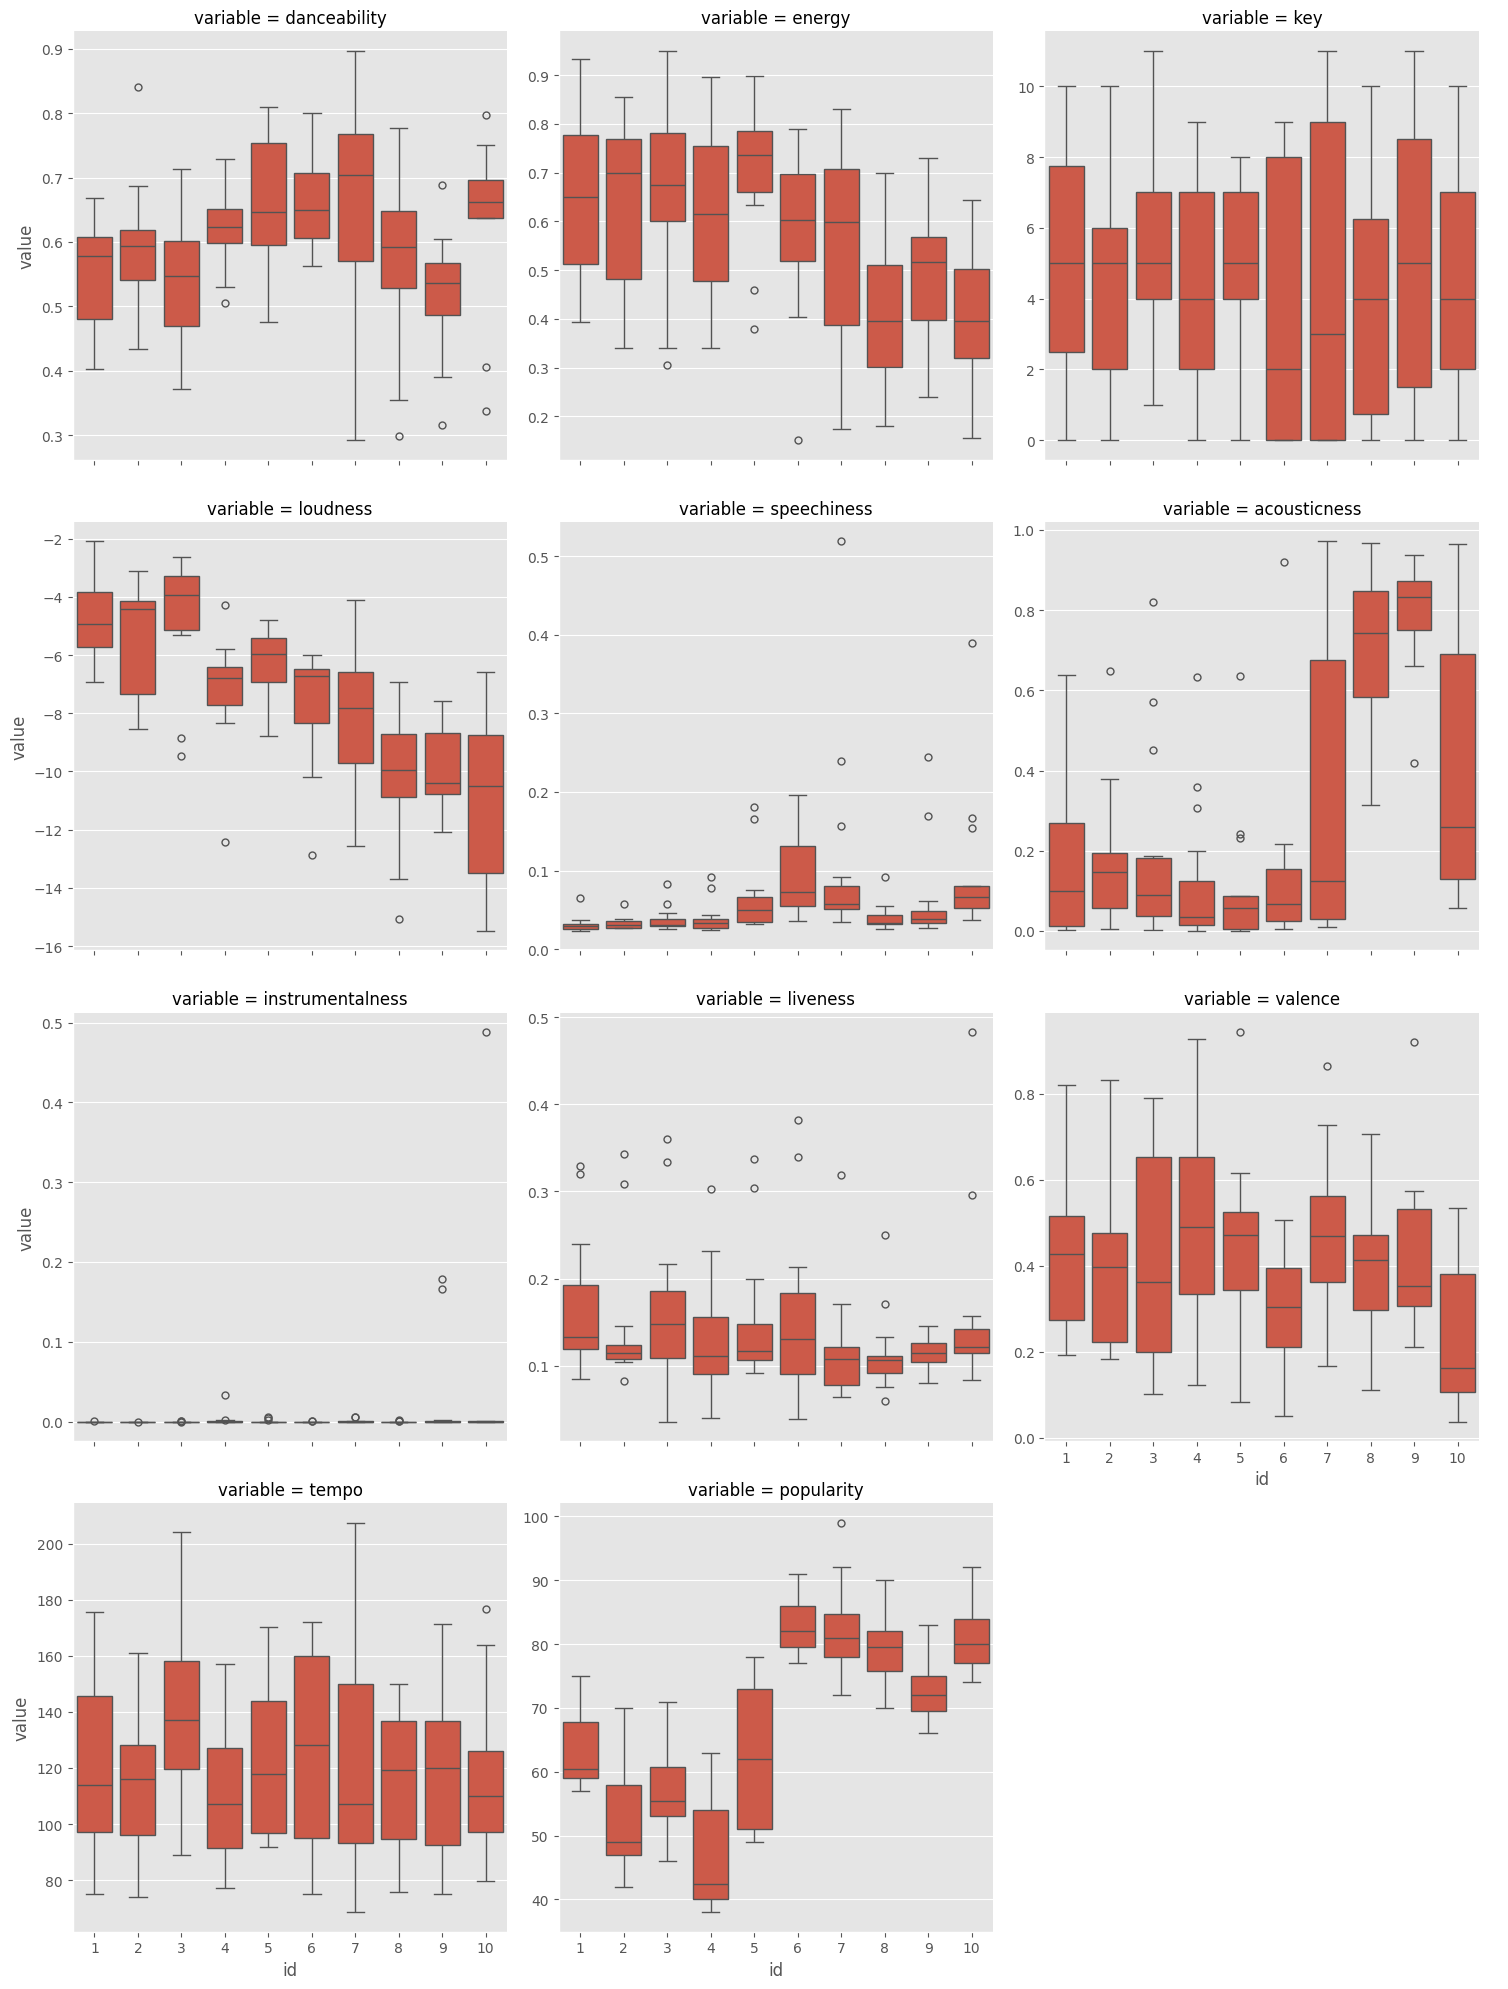

In [42]:
sns.catplot(
    data=df_var_unpivot, x='id', y='value',
    col='variable', kind='box', col_wrap=3, sharey=False
)

In [43]:
df_var_roberta = pd.melt(df_var,id_vars="id", value_vars=['roberta_neg','roberta_pos','roberta_neu'])

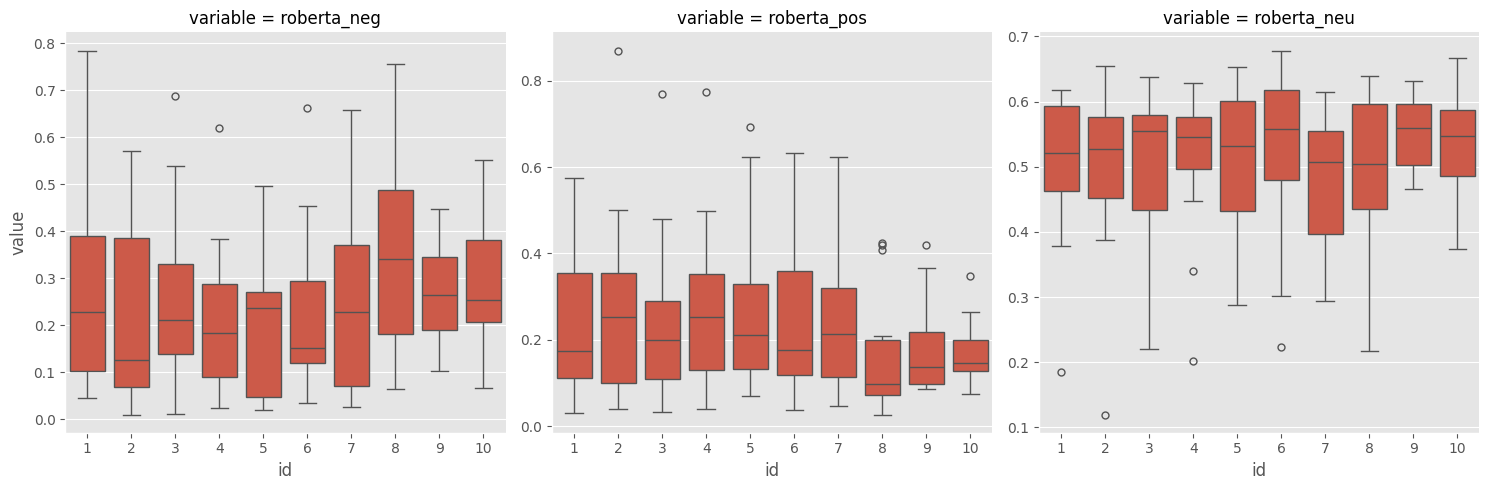

In [44]:
sns.catplot(
    data=df_var_roberta, x='id', y='value',
    col='variable', kind='box', col_wrap=3, sharey=False
)

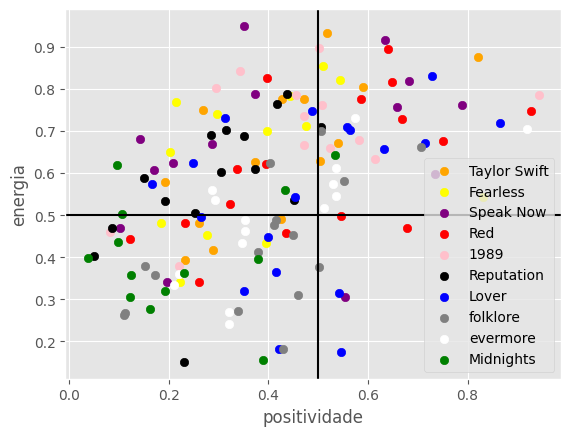

In [74]:
plt.scatter(df_var[df_var.Album_x.isin(["Taylor Swift"])]['valence'],df_var[df_var.Album_x.isin(["Taylor Swift"])]['energy'],c='orange')
plt.scatter(df_var[df_var.Album_x.isin(["Fearless"])]['valence'],df_var[df_var.Album_x.isin(["Fearless"])]['energy'],c='yellow')
plt.scatter(df_var[df_var.Album_x.isin(["Speak Now"])]['valence'],df_var[df_var.Album_x.isin(["Speak Now"])]['energy'],c='purple')
plt.scatter(df_var[df_var.Album_x.isin(["Red"])]['valence'],df_var[df_var.Album_x.isin(["Red"])]['energy'],c='red')
plt.scatter(df_var[df_var.Album_x.isin([1989])]['valence'],df_var[df_var.Album_x.isin([1989])]['energy'],c='pink')
plt.scatter(df_var[df_var.Album_x.isin(["Reputation"])]['valence'],df_var[df_var.Album_x.isin(["Reputation"])]['energy'],c='black')
plt.scatter(df_var[df_var.Album_x.isin(["Lover"])]['valence'],df_var[df_var.Album_x.isin(["Lover"])]['energy'],c='blue')
plt.scatter(df_var[df_var.Album_x.isin(["folklore"])]['valence'],df_var[df_var.Album_x.isin(["folklore"])]['energy'],c='gray')
plt.scatter(df_var[df_var.Album_x.isin(["evermore"])]['valence'],df_var[df_var.Album_x.isin(["evermore"])]['energy'],c='white')
plt.scatter(df_var[df_var.Album_x.isin(["Midnights"])]['valence'],df_var[df_var.Album_x.isin(["Midnights"])]['energy'],c='green')
plt.legend(["Taylor Swift","Fearless","Speak Now","Red",1989,"Reputation","Lover","folklore","evermore","Midnights"])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.axvline(x=0.5, color='black', linestyle='-')
plt.xlabel('positividade')
plt.ylabel('energia')
plt.show()

In [84]:
df_roberta_medio = df_var_roberta.groupby(by=['id','variable'],sort=True,as_index=False).mean()

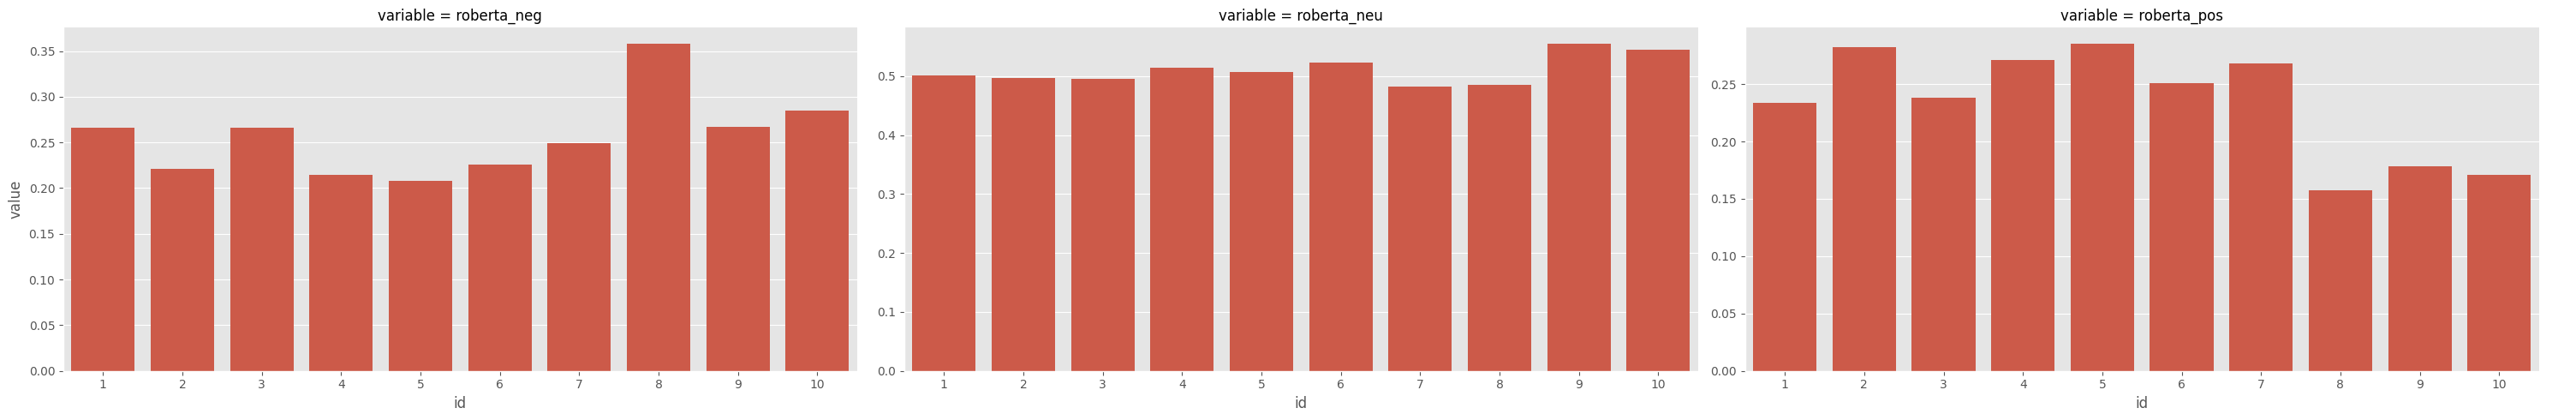

In [90]:
sns.catplot(
    data=df_roberta_medio, x='id', y='value',
    col='variable', kind='bar', col_wrap=3,aspect=2, sharey=False
)

Text(0, 0.5, 'valores médios')

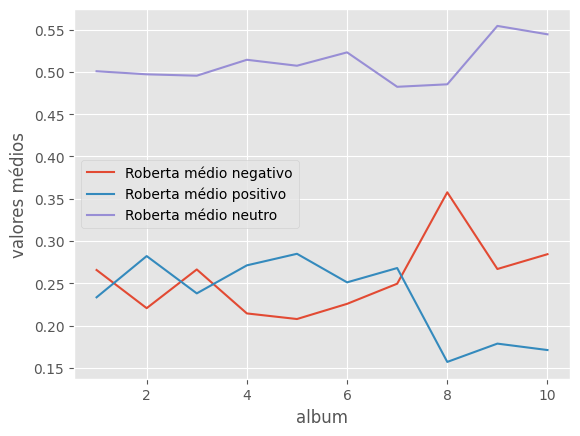

In [97]:
plt.plot(df_roberta_medio[df_roberta_medio.variable.isin(["roberta_neg"])]['id'],df_roberta_medio[df_roberta_medio.variable.isin(["roberta_neg"])]['value'])
plt.plot(df_roberta_medio[df_roberta_medio.variable.isin(["roberta_pos"])]['id'],df_roberta_medio[df_roberta_medio.variable.isin(["roberta_pos"])]['value'])
plt.plot(df_roberta_medio[df_roberta_medio.variable.isin(["roberta_neu"])]['id'],df_roberta_medio[df_roberta_medio.variable.isin(["roberta_neu"])]['value'])
plt.legend(['Roberta médio negativo','Roberta médio positivo','Roberta médio neutro'])
plt.xlabel('album')
plt.ylabel('valores médios')

Clustering

In [ ]:
df_final_limpo = df_final[['lexical_reachness','danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','roberta_neg','roberta_neu','popularity']]

In [ ]:
# Importando os pacotes

import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [ ]:
for coluna in df_final_limpo.columns:
    df_final_limpo[coluna] = stats.zscore(df_final_limpo[coluna])

<ipython-input-47-930611049e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_limpo[coluna] = stats.zscore(df_final_limpo[coluna])


In [ ]:
kmeans = KMeans(n_clusters = 10, init = 'random').fit(df_final_limpo)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#%% Para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_
df_kmeans2 = df_final_limpo

df_kmeans2['cluster_kmeans'] = kmeans_clusters

df_kmeans2

,lexical_reachness,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,roberta_neg,roberta_neu,popularity,cluster_kmeans
track_name,,,,,,,,,,,,,,,,
...Ready For It?,-0.977486,0.103058,1.035567,-0.776747,0.361968,0.349482,1.195210,-0.821980,-0.138887,0.747547,0.074336,1.315476,-1.257860,1.512338,1.143406,7
22,-1.319127,0.490182,0.848390,0.717779,0.343644,0.349482,-0.369335,-0.976007,-0.109787,-0.858873,1.345134,-0.543344,-0.938206,0.103223,-1.082829,7
A Perfectly Good Heart,-0.831882,-1.015301,0.966045,-0.178936,0.637891,0.349482,-0.390047,-0.971924,-0.138887,-0.162494,-0.680043,1.185278,1.427435,-0.917217,-0.804549,7
A Place in this World,0.162238,-0.215245,1.105090,1.315590,1.640444,0.349482,-0.455369,-0.827160,-0.138887,2.369795,0.130028,-0.177573,-0.635294,0.813346,-0.595840,0
Afterglow,-0.638503,1.333252,-0.649026,1.315590,-0.426331,0.349482,-0.423505,-0.586445,-0.138887,-0.347140,-0.016797,-0.310892,0.654747,0.188412,0.865127,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the last great american dynasty,1.745190,0.731059,0.490080,0.717779,-0.341405,0.349482,-0.313572,0.440402,-0.087403,-0.413085,1.537526,0.914128,1.154367,-0.507887,0.586848,8
this is me trying,1.242307,-0.740013,-0.504632,1.315590,-0.812904,0.349482,-0.448996,-0.025792,-0.137826,0.404633,0.049021,0.514672,0.924836,-0.112500,0.795557,8
tolerate it,0.384934,-2.451961,-1.119643,1.315590,-1.002491,0.349482,-0.194081,1.692729,-0.138289,-0.799523,-0.918001,-1.507635,-0.156647,0.743355,0.795557,3


In [ ]:
#Estatística F

# Análise de variância de um fator:
# As variáveis que mais contribuem para a formação de pelo menos um dos clusters

def teste_f_kmeans(kmeans, dataframe):

    variaveis = dataframe.columns

    centroides = pd.DataFrame(kmeans.cluster_centers_)
    centroides.columns = dataframe.columns
    centroides

    print("Centróides: \n", centroides ,"\n")

    df = dataframe[variaveis]

    unique, counts = np.unique(kmeans.labels_, return_counts=True)

    dic = dict(zip(unique, counts))

    qnt_clusters = kmeans.n_clusters

    observacoes = len(kmeans.labels_)

    df['cluster'] = kmeans.labels_

    output = []

    for variavel in variaveis:

        dic_var={'variavel':variavel}

        # variabilidade entre os grupos

        variabilidade_entre_grupos = np.sum([dic[index]*np.square(observacao - df[variavel].mean()) for index, observacao in enumerate(centroides[variavel])])/(qnt_clusters - 1)

        dic_var['variabilidade_entre_grupos'] = variabilidade_entre_grupos

        variabilidade_dentro_dos_grupos = 0

        for grupo in unique:

            grupo = df[df.cluster == grupo]

            variabilidade_dentro_dos_grupos += np.sum([np.square(observacao - grupo[variavel].mean()) for observacao in grupo[variavel]])/(observacoes - qnt_clusters)

        dic_var['variabilidade_dentro_dos_grupos'] = variabilidade_dentro_dos_grupos

        dic_var['F'] =  dic_var['variabilidade_entre_grupos']/dic_var['variabilidade_dentro_dos_grupos']

        dic_var['sig F'] =  1 - stats.f.cdf(dic_var['F'], qnt_clusters - 1, observacoes - qnt_clusters)

        output.append(dic_var)

    df = pd.DataFrame(output)

    print(df)

    return df

In [ ]:
# Os valores da estatística F são bastante sensíveis ao tamanho da amostra

output = teste_f_kmeans(kmeans,df_final_limpo)

Centróides: 
    lexical_reachness  danceability    energy       key  loudness      mode  \
0          -0.570268      0.221653  0.661595  0.525626  0.690724  0.120134   
1           0.311514      1.045059 -0.888345  0.792506 -1.142743 -1.255950   
2           0.129072     -0.288784 -0.111992 -0.381421  0.358376  0.349482   
3          -0.066831     -0.447949 -0.686729 -0.119155 -1.038329  0.349482   
4           1.005574     -1.010139 -1.471001 -0.388170 -1.456794  0.349482   
5          -0.296407     -0.972287 -0.379848 -0.477842 -1.299909  0.349482   
6          -0.855139      0.223496  0.350589 -0.029484  0.322882 -2.861381   
7          -0.401197      0.304266  0.956834  0.128272  0.810396  0.349482   
8           1.234438      0.556710 -0.768463  0.478655 -0.664924  0.135424   
9           0.547379      0.829991  0.110378 -1.225105 -0.024781  0.349482   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0    -0.070264     -0.636649         -0.138475 

In [ ]:
df_kmeans2 = pd.merge(df_kmeans2,df_var,
                           on="track_name",
                                how="inner")

In [ ]:
df_kmeans2

,track_name,lexical_reachness_x,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,acousticness_x,instrumentalness_x,...,instrumentalness_y,liveness_y,valence_y,tempo_y,roberta_neg_y,roberta_neu_y,roberta_pos_y,popularity_y,album_name,id
0,...Ready For It?,-0.977486,0.103058,1.035567,-0.776747,0.361968,0.349482,1.195210,-0.821980,-0.138887,...,0.000000,0.1970,0.417,160.015,0.034678,0.678398,0.286924,85,Reputation,6
1,22,-1.319127,0.490182,0.848390,0.717779,0.343644,0.349482,-0.369335,-0.976007,-0.109787,...,0.001300,0.0752,0.668,104.007,0.091133,0.521151,0.387716,53,Red,4
2,A Perfectly Good Heart,-0.831882,-1.015301,0.966045,-0.178936,0.637891,0.349482,-0.390047,-0.971924,-0.138887,...,0.000000,0.1280,0.268,156.092,0.508937,0.407277,0.083786,57,Taylor Swift,1
3,A Place in this World,0.162238,-0.215245,1.105090,1.315590,1.640444,0.349482,-0.455369,-0.827160,-0.138887,...,0.000000,0.3200,0.428,115.028,0.144631,0.600395,0.254973,60,Taylor Swift,1
4,Afterglow,-0.638503,1.333252,-0.649026,1.315590,-0.426331,0.349482,-0.423505,-0.586445,-0.138887,...,0.000000,0.1140,0.399,111.011,0.372470,0.530657,0.096873,81,Lover,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,the last great american dynasty,1.745190,0.731059,0.490080,0.717779,-0.341405,0.349482,-0.313572,0.440402,-0.087403,...,0.002300,0.1090,0.706,147.922,0.460709,0.452956,0.086335,77,folklore,8
143,this is me trying,1.242307,-0.740013,-0.504632,1.315590,-0.812904,0.349482,-0.448996,-0.025792,-0.137826,...,0.000047,0.1710,0.412,135.886,0.420171,0.497078,0.082751,80,folklore,8
144,tolerate it,0.384934,-2.451961,-1.119643,1.315590,-1.002491,0.349482,-0.194081,1.692729,-0.138289,...,0.000027,0.0797,0.221,74.952,0.229167,0.592585,0.178248,80,evermore,9
145,willow,-0.669046,-1.798152,0.019464,0.717779,-0.584555,0.349482,1.736906,1.555613,-0.098819,...,0.001790,0.1450,0.529,81.112,0.265417,0.632324,0.102258,82,evermore,9


In [ ]:
df_kmeans2=df_kmeans2[["cluster_kmeans","Album_x","track_name"]]

<ipython-input-55-d7d1af42c006>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_kmeans2["cluster_kmeans"], palette= pal)
<ipython-input-55-d7d1af42c006>:3: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=df_kmeans2["cluster_kmeans"], palette= pal)


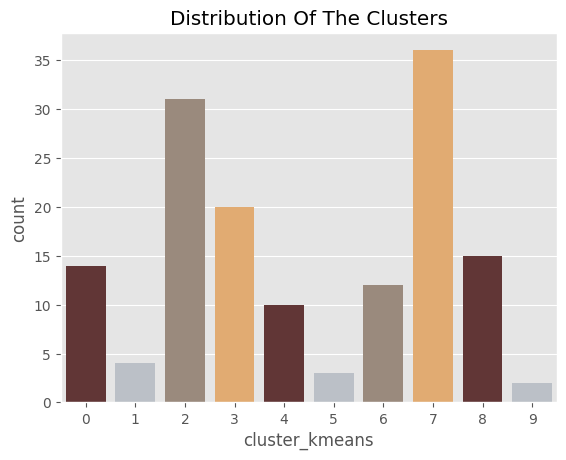

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_kmeans2["cluster_kmeans"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

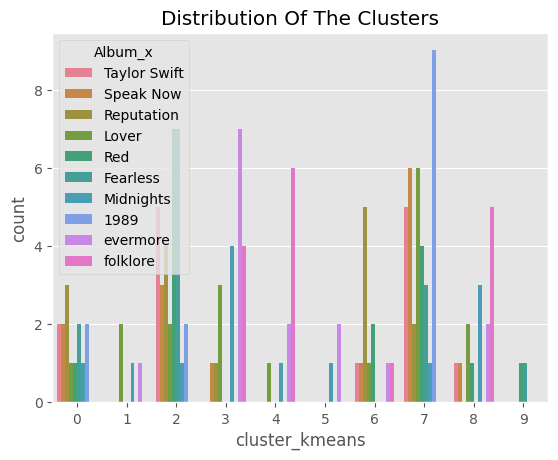

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(data=df_kmeans2,x="cluster_kmeans",hue="Album_x")
pl.set_title("Distribution Of The Clusters")
plt.show()

PCA

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<Axes: >

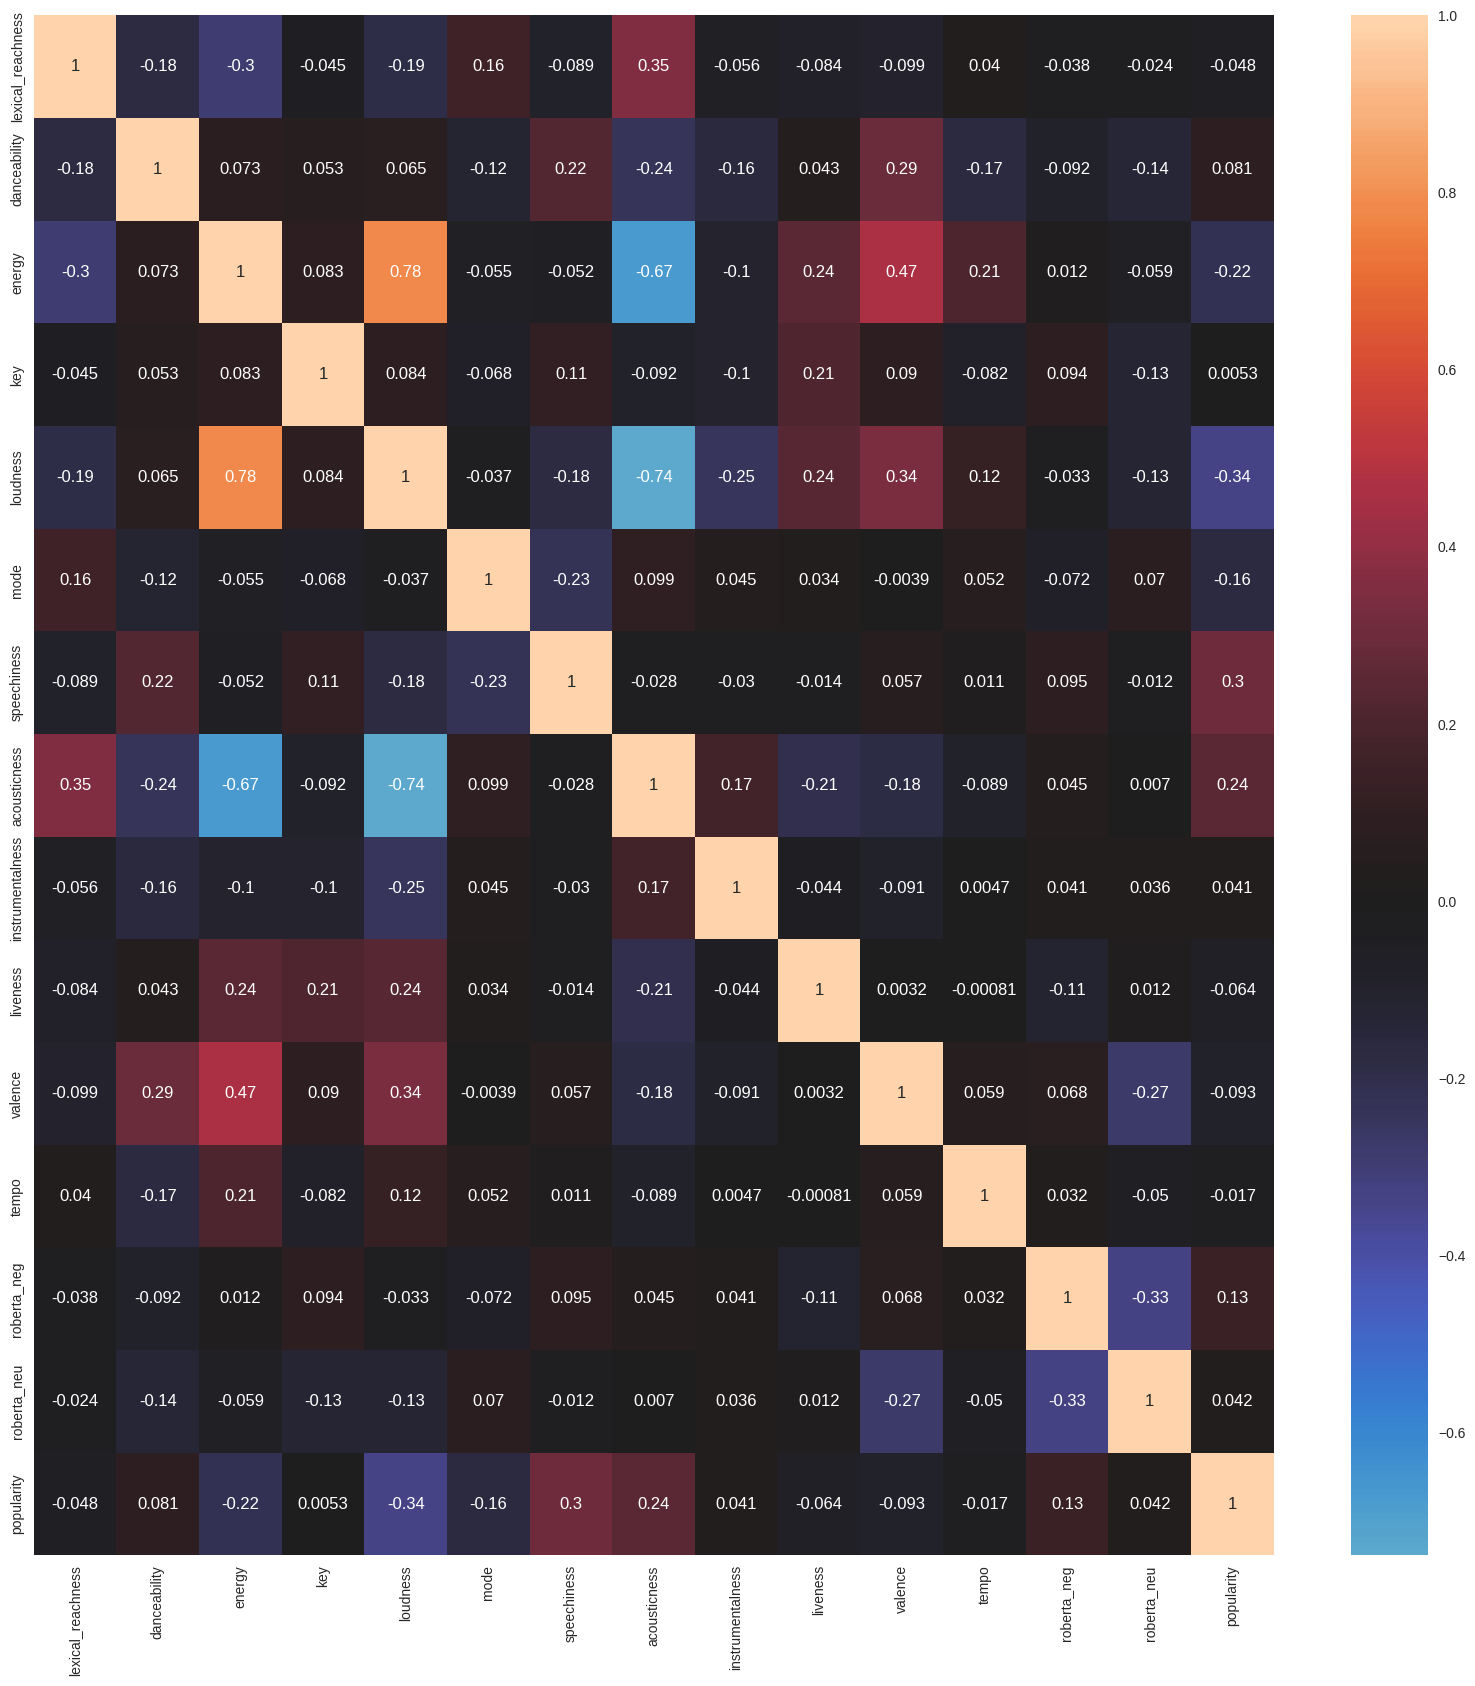

In [ ]:
#correlation matrix
corrmat= df_final_limpo.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,center=0)

In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 31.0 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=1afcedbe1b94bf537440d30de3e7056b8c68faec09f1504b9993a08346498a77
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
import scipy.stats as stats

In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [ ]:
#%% Teste de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(df_final_limpo)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 520.9239987328566
p-value : 2.1937864214979905e-56


In [ ]:
#%% Definindo a PCA (procedimento preliminar)

fa = FactorAnalyzer()
fa.fit(df_final_limpo)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
#%% Obtendo os Eigenvalues (autovalores)

ev, v = fa.get_eigenvalues()

In [ ]:
print(ev)

[3.14428541 1.81210067 1.42556421 1.22059308 1.14384829 1.03676272
 0.95229182 0.78273197 0.73844263 0.68707939 0.66347391 0.55006753
 0.48934248 0.20119425 0.15222164]


critério de kaiser - 6 fatores

In [ ]:
#%% Parametrizando a PCA para 6 fatores (autovalores > 1)

fa.set_params(n_factors = 6, method = 'principal', rotation = None)
fa.fit(df_final_limpo)

FactorAnalyzer(method='principal', n_factors=6, rotation=None,
               rotation_kwargs={})

In [ ]:
#%% Eigenvalues, variâncias e variâncias acumulada

eigen_fatores = fa.get_factor_variance()
eigen_fatores

tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)


         Autovalor  Variância  Variância Acumulada
Fator 1   3.144285   0.209619             0.209619
Fator 2   1.812101   0.120807             0.330426
Fator 3   1.425564   0.095038             0.425463
Fator 4   1.220593   0.081373             0.506836
Fator 5   1.143848   0.076257             0.583093
Fator 6   1.036763   0.069118             0.652210


In [ ]:
#%% Determinando as cargas fatoriais

cargas_fatores = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = df_final_limpo.columns
tabela_cargas

print(tabela_cargas)

                    Fator 1   Fator 2   Fator 3   Fator 4   Fator 5   Fator 6
lexical_reachness -0.384418 -0.281493  0.311828 -0.382228 -0.035730  0.420628
danceability       0.269793  0.509346 -0.252464 -0.344431 -0.427568 -0.088321
energy             0.876837 -0.083179  0.044291  0.214608  0.013131  0.020409
key                0.190385  0.281417  0.054301 -0.398094  0.629544  0.002568
loudness           0.887492 -0.202973  0.046965  0.023707  0.011171  0.046043
mode              -0.096779 -0.511856  0.166609 -0.238835 -0.064698 -0.057379
speechiness       -0.051407  0.664725 -0.184435  0.139515  0.027166  0.303211
acousticness      -0.830763  0.015850  0.207428 -0.139958 -0.005162 -0.002190
instrumentalness  -0.269414 -0.084202  0.065391  0.451300  0.118144 -0.584994
liveness           0.331364 -0.081710 -0.252553 -0.211350  0.593969  0.019839
valence            0.517464  0.234873  0.332040 -0.149439 -0.355882 -0.048925
tempo              0.151283 -0.183855  0.305605  0.492025  0.032

In [ ]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = df_final_limpo.columns
tabela_comunalidades

print(tabela_comunalidades)

                   Comunalidades
lexical_reachness       0.648555
danceability            0.705207
energy                  0.824370
key                     0.673201
loudness                0.833851
mode                    0.363641
speechiness             0.590658
acousticness            0.753064
instrumentalness        0.643797
liveness                0.578124
valence                 0.584563
tempo                   0.725078
roberta_neg             0.641731
roberta_neu             0.675322
popularity              0.541993


In [ ]:
#%% Resultados dos fatores para as observações do dataset (predict)

predict_fatores= pd.DataFrame(fa.transform(df_final_limpo))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]

print(predict_fatores)

      Fator 1   Fator 2   Fator 3   Fator 4   Fator 5   Fator 6
0    0.617648 -0.026754 -1.675580  1.493486 -0.190804  1.368689
1    1.067361 -0.126008 -0.383729 -0.428816 -0.924081 -1.054424
2    0.779986 -0.536248  1.252377  1.248808  0.680388 -0.036881
3    1.324848 -0.909107 -0.859479 -0.851882  1.798890  0.129656
4   -0.031338  0.905994 -0.246383 -0.581017  0.209305 -0.541942
..        ...       ...       ...       ...       ...       ...
142  0.029792  0.481017  1.751236 -0.621442 -0.353905  0.895721
143 -0.502383  0.041685  0.937983 -0.459071  1.363820  0.754711
144 -1.654534 -0.385550 -0.087801 -0.510609  1.415882 -0.238649
145 -0.748990  0.636154 -0.515160  0.153938  0.965269 -0.037477
146 -0.767306 -0.495978 -0.165521  0.096851 -0.143720  0.720850

[147 rows x 6 columns]


In [ ]:
# Adicionando ao dataset

df_final_pca = pd.concat([df_final_limpo.reset_index(drop=False), predict_fatores], axis=1)

df_final_pca = df_final_pca.set_index("track_name",drop=True)

df_final_pca

,lexical_reachness,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,roberta_neg,roberta_neu,popularity,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
track_name,,,,,,,,,,,,,,,,,,,,,
...Ready For It?,-0.977486,0.103058,1.035567,-0.776747,0.361968,0.349482,1.195210,-0.821980,-0.138887,0.747547,...,1.315476,-1.257860,1.512338,1.143406,0.617648,-0.026754,-1.675580,1.493486,-0.190804,1.368689
22,-1.319127,0.490182,0.848390,0.717779,0.343644,0.349482,-0.369335,-0.976007,-0.109787,-0.858873,...,-0.543344,-0.938206,0.103223,-1.082829,1.067361,-0.126008,-0.383729,-0.428816,-0.924081,-1.054424
A Perfectly Good Heart,-0.831882,-1.015301,0.966045,-0.178936,0.637891,0.349482,-0.390047,-0.971924,-0.138887,-0.162494,...,1.185278,1.427435,-0.917217,-0.804549,0.779986,-0.536248,1.252377,1.248808,0.680388,-0.036881
A Place in this World,0.162238,-0.215245,1.105090,1.315590,1.640444,0.349482,-0.455369,-0.827160,-0.138887,2.369795,...,-0.177573,-0.635294,0.813346,-0.595840,1.324848,-0.909107,-0.859479,-0.851882,1.798890,0.129656
Afterglow,-0.638503,1.333252,-0.649026,1.315590,-0.426331,0.349482,-0.423505,-0.586445,-0.138887,-0.347140,...,-0.310892,0.654747,0.188412,0.865127,-0.031338,0.905994,-0.246383,-0.581017,0.209305,-0.541942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the last great american dynasty,1.745190,0.731059,0.490080,0.717779,-0.341405,0.349482,-0.313572,0.440402,-0.087403,-0.413085,...,0.914128,1.154367,-0.507887,0.586848,0.029792,0.481017,1.751236,-0.621442,-0.353905,0.895721
this is me trying,1.242307,-0.740013,-0.504632,1.315590,-0.812904,0.349482,-0.448996,-0.025792,-0.137826,0.404633,...,0.514672,0.924836,-0.112500,0.795557,-0.502383,0.041685,0.937983,-0.459071,1.363820,0.754711
tolerate it,0.384934,-2.451961,-1.119643,1.315590,-1.002491,0.349482,-0.194081,1.692729,-0.138289,-0.799523,...,-1.507635,-0.156647,0.743355,0.795557,-1.654534,-0.385550,-0.087801,-0.510609,1.415882,-0.238649


In [ ]:
df_final_pca = df_final_pca[['Fator 1','Fator 2','Fator 3','Fator 4','Fator 5','Fator 6']]

Cluster + PCA

In [ ]:
kmeans = KMeans(n_clusters = 10, init = 'random').fit(df_final_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#%% Para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_
df_kmeans3 = df_final_pca

df_kmeans3['cluster_kmeans'] = kmeans_clusters

df_kmeans3

<ipython-input-74-e742c62043da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans3['cluster_kmeans'] = kmeans_clusters


,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,cluster_kmeans
track_name,,,,,,,
...Ready For It?,0.617648,-0.026754,-1.675580,1.493486,-0.190804,1.368689,3
22,1.067361,-0.126008,-0.383729,-0.428816,-0.924081,-1.054424,7
A Perfectly Good Heart,0.779986,-0.536248,1.252377,1.248808,0.680388,-0.036881,4
A Place in this World,1.324848,-0.909107,-0.859479,-0.851882,1.798890,0.129656,0
Afterglow,-0.031338,0.905994,-0.246383,-0.581017,0.209305,-0.541942,7
...,...,...,...,...,...,...,...
the last great american dynasty,0.029792,0.481017,1.751236,-0.621442,-0.353905,0.895721,9
this is me trying,-0.502383,0.041685,0.937983,-0.459071,1.363820,0.754711,1
tolerate it,-1.654534,-0.385550,-0.087801,-0.510609,1.415882,-0.238649,1


In [ ]:
df_final_pca=df_final_pca.drop(columns=["cluster_kmeans"])

In [ ]:
# Os valores da estatística F são bastante sensíveis ao tamanho da amostra

output = teste_f_kmeans(kmeans,df_final_pca)

Centróides: 
     Fator 1   Fator 2   Fator 3   Fator 4   Fator 5   Fator 6
0  0.572821 -0.522798 -1.008942 -0.858306  1.008684 -0.247311
1 -0.975144  0.070334  0.224166 -0.812221  0.819252 -0.248645
2 -0.663161  2.687905 -0.965983 -0.229801  0.019823  0.830328
3  0.547650 -0.346339 -0.508113  0.624995 -0.647315  0.517395
4  0.444831 -1.132477  0.377232  0.797641  0.624623  0.673983
5  0.920855  1.228288  0.193058  1.262243  0.843098  0.724090
6 -1.556982 -0.555594  0.538729  2.771167  0.670958 -3.433591
7  0.448872  0.286156 -0.311376 -0.243378 -0.956783 -0.788139
8 -1.290357 -0.326569  0.091869 -0.011791 -0.564614  0.516389
9  0.637356  0.130033  1.731706 -0.533994  0.149129 -0.153316 

  variavel  variabilidade_entre_grupos  variabilidade_dentro_dos_grupos  \
0  Fator 1                   11.008378                         0.349815   
1  Fator 2                    8.962150                         0.484238   
2  Fator 3                    8.249605                         0.531048   
3 

In [ ]:
df_kmeans3 = pd.merge(df_kmeans3,df_var,
                           on="track_name",
                                how="inner")

In [ ]:
df_kmeans3=df_kmeans3[["cluster_kmeans","Album_x","track_name"]]

<ipython-input-79-2d9e3946dc63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_kmeans3["cluster_kmeans"], palette= pal)
<ipython-input-79-2d9e3946dc63>:3: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=df_kmeans3["cluster_kmeans"], palette= pal)


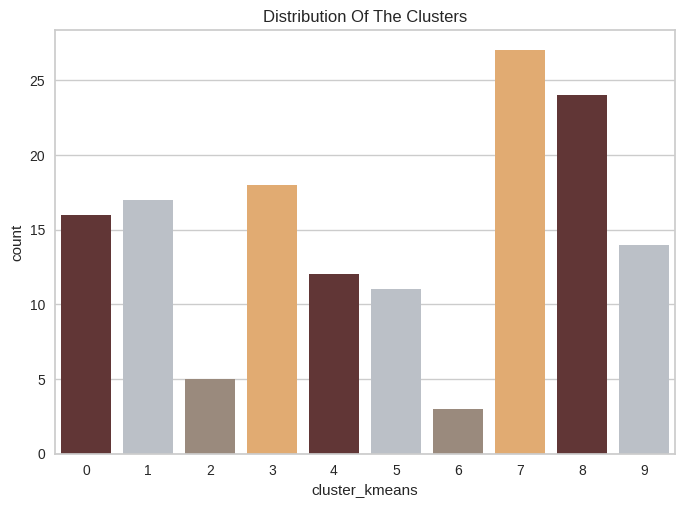

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_kmeans3["cluster_kmeans"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

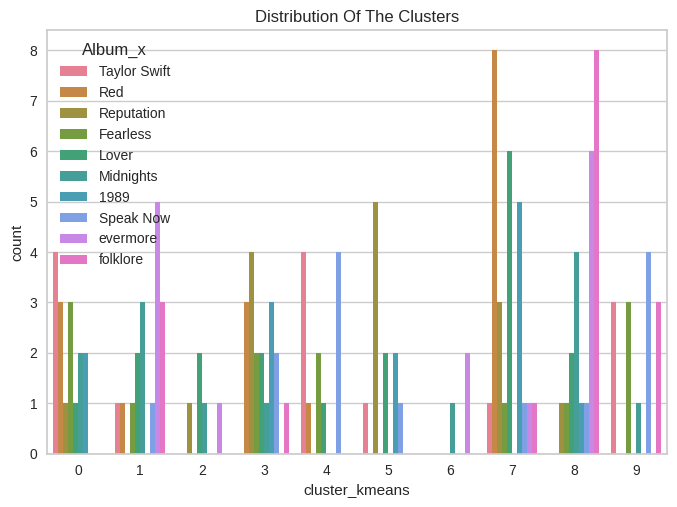

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(data=df_kmeans3,x="cluster_kmeans",hue="Album_x")
pl.set_title("Distribution Of The Clusters")
plt.show()

Random Forest

In [ ]:
df_final = df_final_copia

In [ ]:
df_final = df_final[['Album_x','lexical_reachness','danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','roberta_neg','roberta_neu','popularity']]

In [ ]:
df_final =df_final.reset_index(drop=True)

In [ ]:
df_final['Album_x'] = df_final['Album_x'].astype('str')

In [ ]:
dataTypes2 = df_final.dtypes
print(len(df_final))
print(dataTypes2)

147
Album_x               object
lexical_reachness    float64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
roberta_neg          float32
roberta_neu          float32
popularity             int64
dtype: object


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
# Putting feature variable to X
X = df_final.drop('Album_x',axis=1)
# Putting response variable to y
y = df_final['Album_x']

In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((102, 15), (45, 15))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

0.35294117647058826

In [ ]:
# Predict the Test set results

y_pred = classifier_rf.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.3556


In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.3930769230769231

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

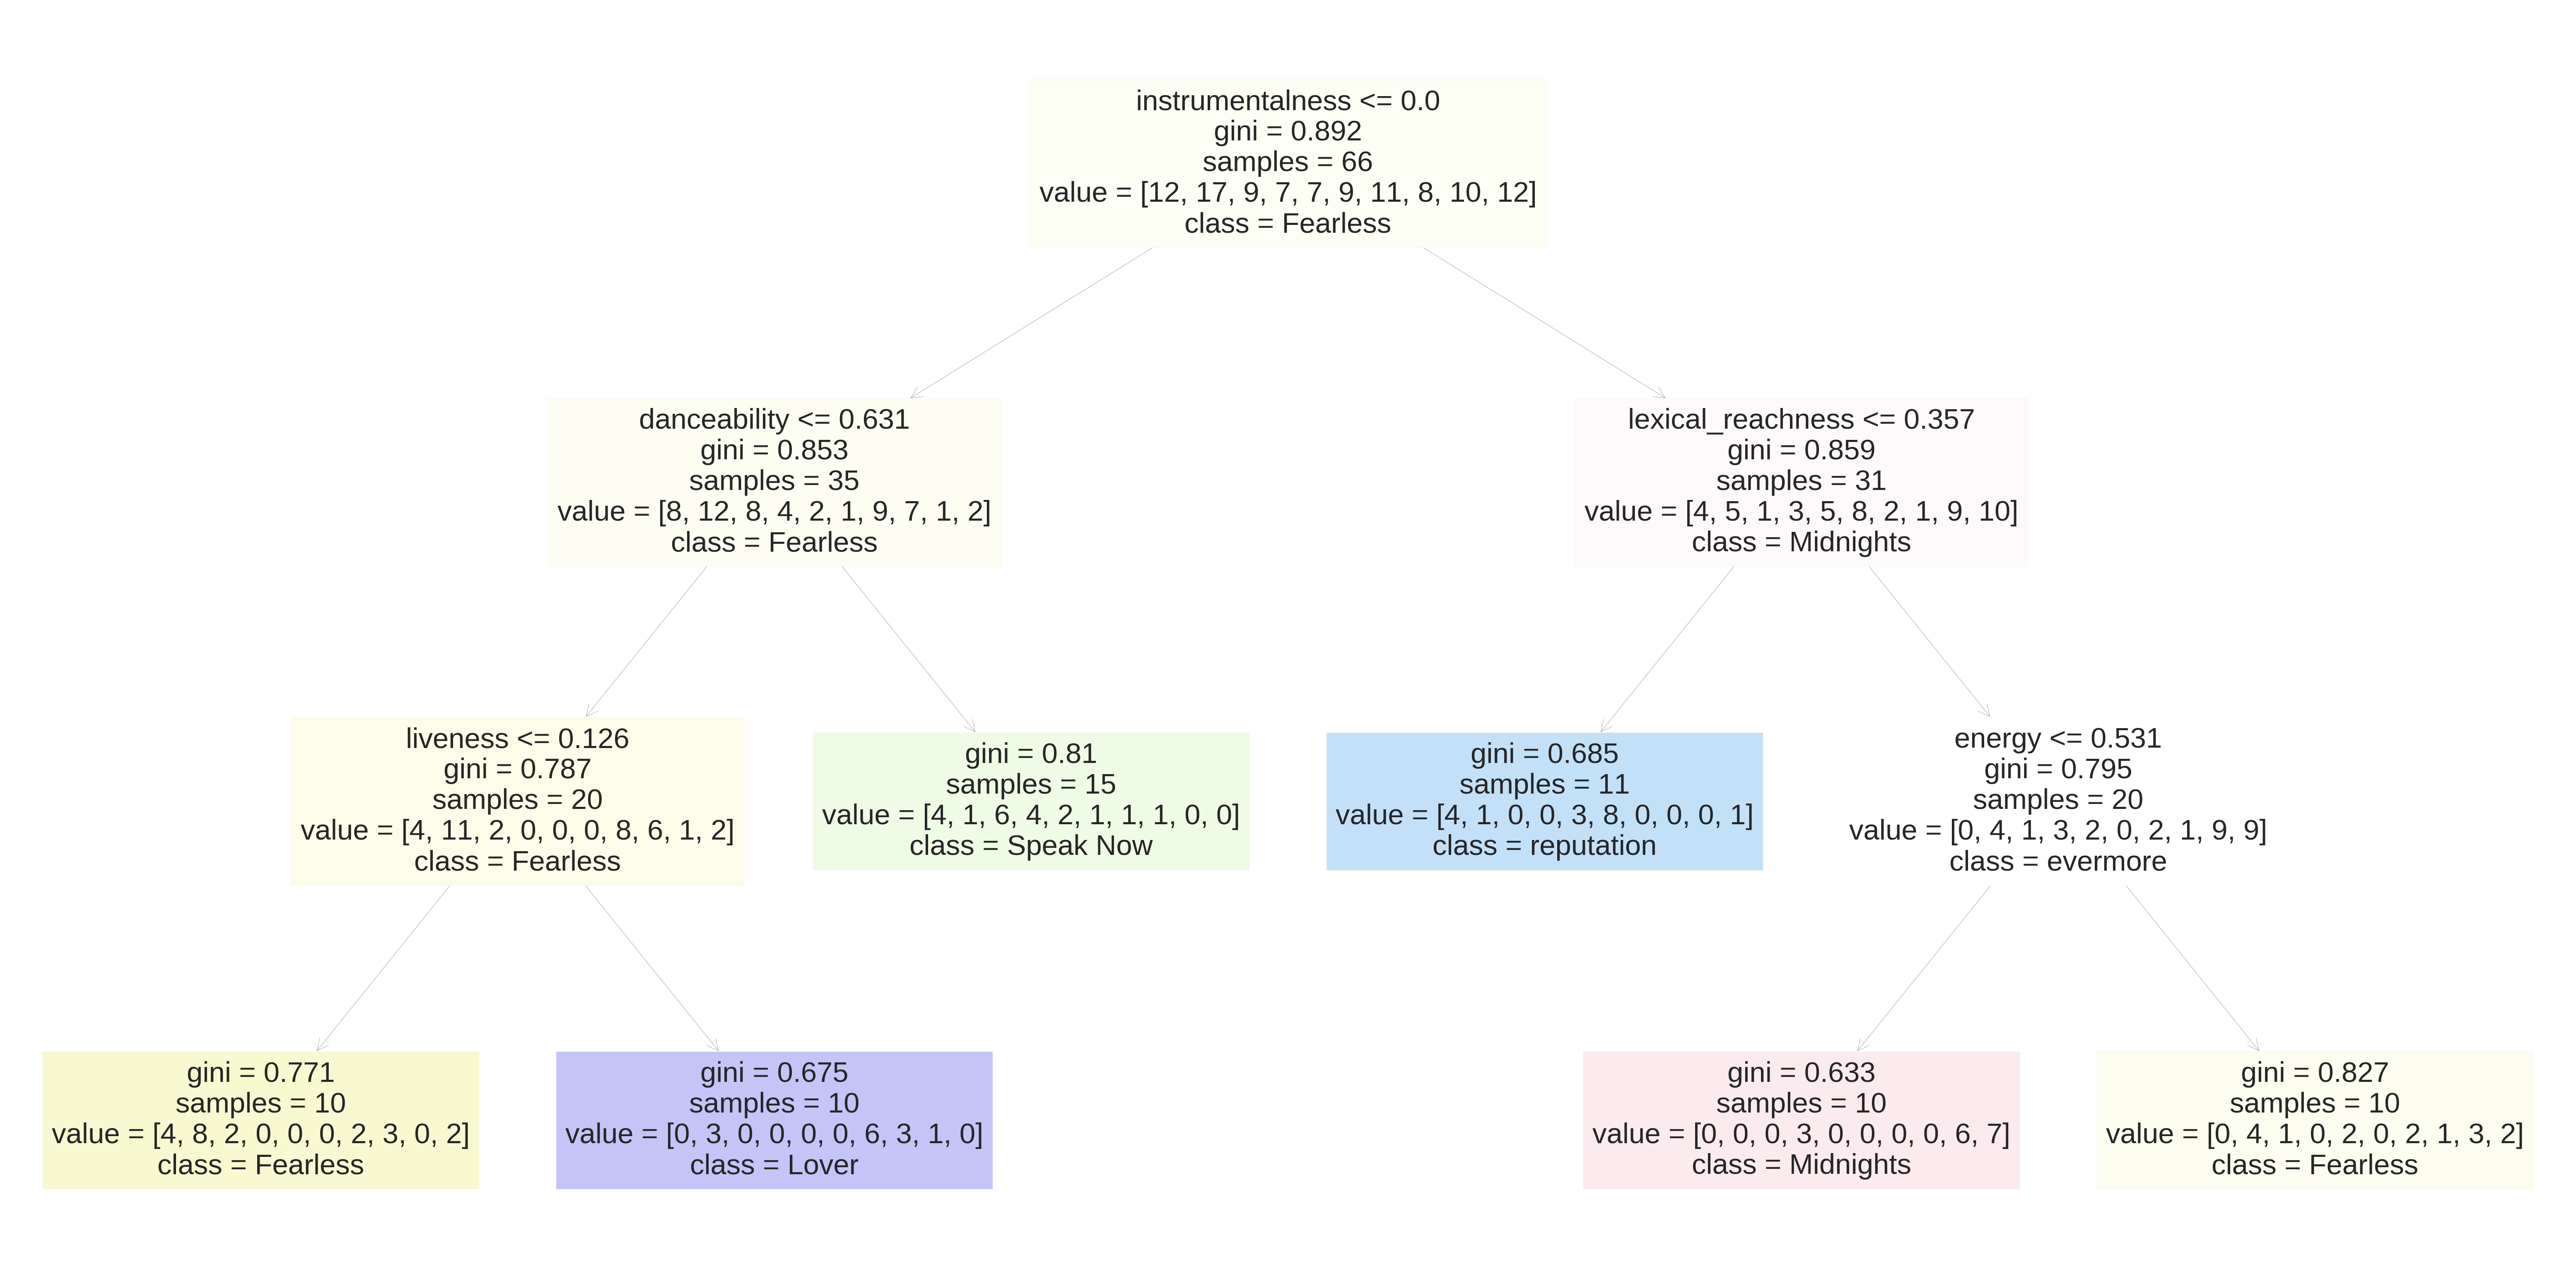

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=["Taylor Swift","Fearless","Speak Now","Red","1989","reputation","Lover","folklore","evermore","Midnights"],filled=True);

In [ ]:
rf_best.feature_importances_

array([0.03288778, 0.0490454 , 0.0644721 , 0.02355722, 0.18502652,
       0.        , 0.10186396, 0.12519469, 0.06856844, 0.04511039,
       0.02582583, 0.03364813, 0.00537701, 0.00697453, 0.232448  ])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
14,popularity,0.232448
4,loudness,0.185027
7,acousticness,0.125195
6,speechiness,0.101864
8,instrumentalness,0.068568
2,energy,0.064472
1,danceability,0.049045
9,liveness,0.045110
11,tempo,0.033648
0,lexical_reachness,0.032888


In [ ]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [ ]:
# Predict on the test set results

y_pred_best = rf_best.predict(X_test)



# Check accuracy score

print('Model accuracy score with best decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_best)))

Model accuracy score with best decision-trees : 0.2889


In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 1 3]
 [0 0 1 2 0 1 0 0 0 2]
 [1 0 0 0 2 0 0 0 0 0]
 [0 0 4 0 0 2 0 0 0 0]
 [0 1 0 0 0 0 1 1 1 0]
 [0 2 0 0 0 0 1 1 0 0]
 [0 0 0 0 1 1 0 1 3 1]
 [0 0 0 0 0 0 0 0 4 2]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1989       0.50      0.50      0.50         2
    Fearless       0.25      1.00      0.40         1
       Lover       0.17      0.17      0.17         6
   Midnights       1.00      0.33      0.50         6
         Red       0.67      0.67      0.67         3
  Reputation       0.40      0.33      0.36         6
   Speak Now       0.33      0.25      0.29         4
Taylor Swift       0.33      0.25      0.29         4
    evermore       0.33      0.43      0.38         7
    folklore       0.25      0.33      0.29         6

    accuracy                           0.36        45
   macro avg       0.42      0.43      0.38        45
weighted avg       0.43      0.36      0.36        45



Random forest retirando a variável mode, pois tem uma importancia de 0.0000

In [ ]:
df_final = df_final_copia

In [ ]:
df_final['Album_x'] = df_final['Album_x'].astype('str')

In [ ]:
df_final = df_final[['Album_x','lexical_reachness','danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','roberta_neg','roberta_neu','popularity']]

In [ ]:
# Putting feature variable to X
X = df_final.drop('Album_x',axis=1)
# Putting response variable to y
y = df_final['Album_x']

In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1,stratify=y)
X_train.shape, X_test.shape

((102, 14), (45, 14))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=1)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

0.38235294117647056

In [ ]:
# Predict the Test set results

y_pred = classifier_rf.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.4000


In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.44153846153846155

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

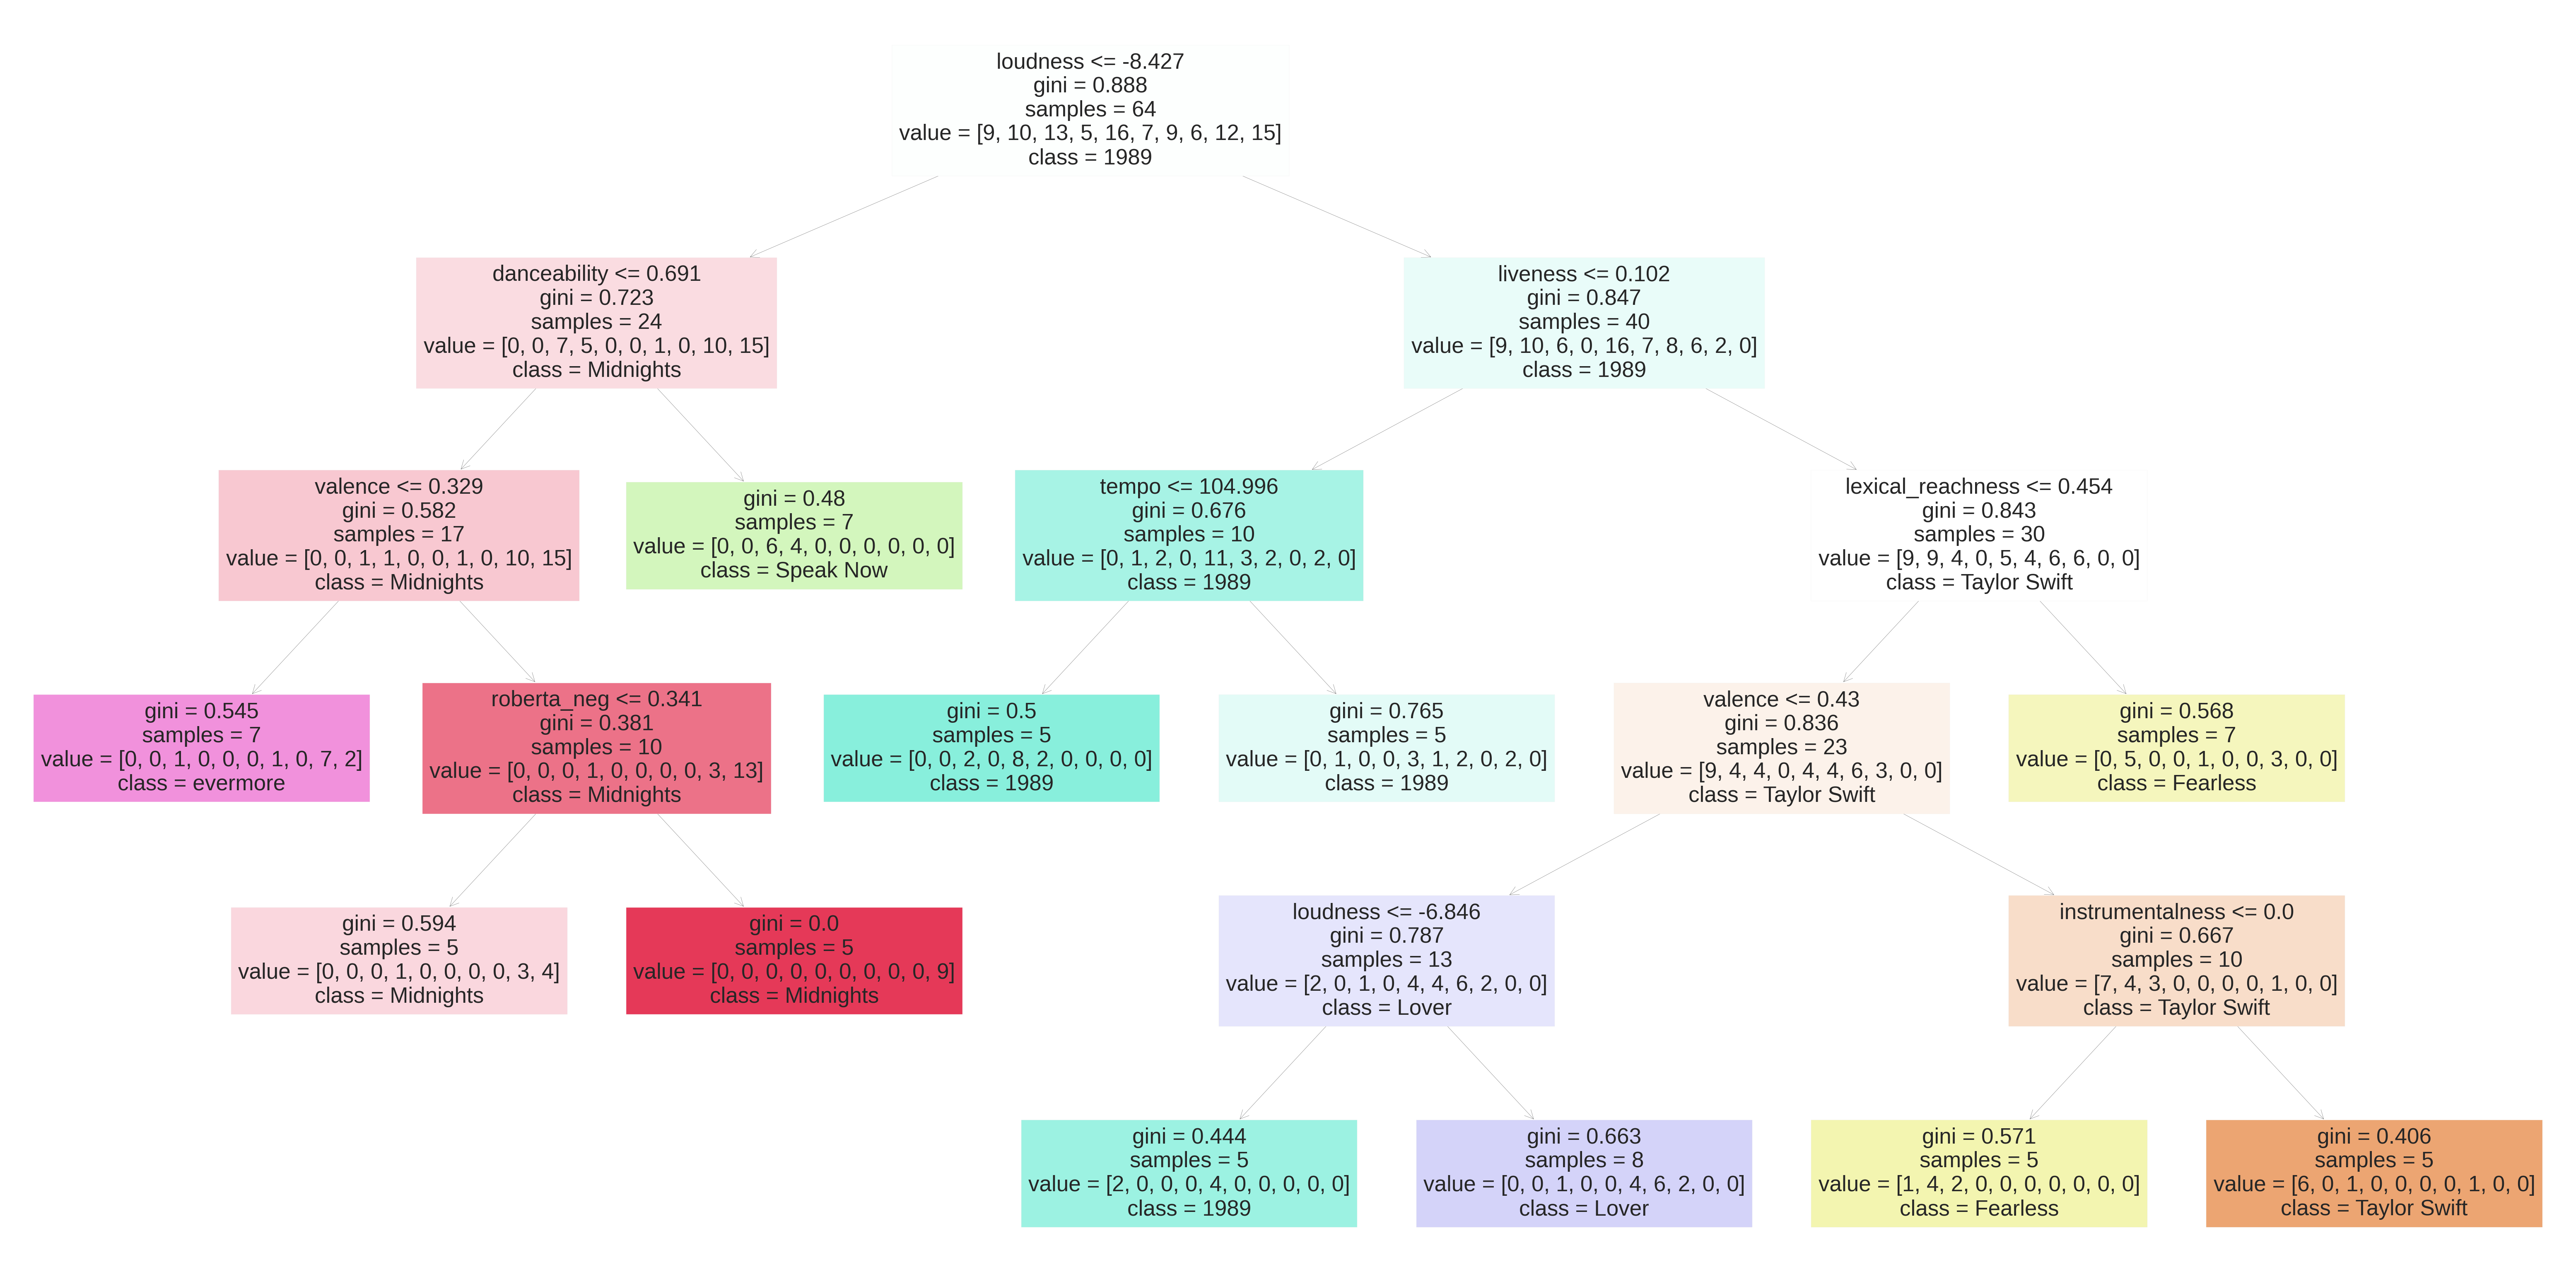

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9], feature_names = X.columns,class_names=["Taylor Swift","Fearless","Speak Now","Red","1989","reputation","Lover","folklore","evermore","Midnights"],filled=True);

In [ ]:
rf_best.feature_importances_

array([0.06665841, 0.0711506 , 0.04606931, 0.02271731, 0.13513195,
       0.10948357, 0.07650854, 0.054048  , 0.03653952, 0.06825889,
       0.04970771, 0.06381905, 0.02575537, 0.17415177])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
13,popularity,0.174152
4,loudness,0.135132
5,speechiness,0.109484
6,acousticness,0.076509
1,danceability,0.071151
9,valence,0.068259
0,lexical_reachness,0.066658
11,roberta_neg,0.063819
7,instrumentalness,0.054048
10,tempo,0.049708


In [ ]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [ ]:
# Predict on the test set results

y_pred_best = rf_best.predict(X_test)



# Check accuracy score

print('Model accuracy score with best decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_best)))

Model accuracy score with best decision-trees : 0.4000


In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 0 1 2 0 0]
 [0 0 1 1 0 2 0 0 0 1]
 [0 0 0 3 0 0 0 0 1 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 2 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 3 1 0]
 [0 3 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 1 3]
 [0 0 2 0 0 0 0 0 0 3]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        1989       1.00      0.25      0.40         4
    Fearless       0.00      0.00      0.00         4
       Lover       0.25      0.20      0.22         5
   Midnights       0.50      0.75      0.60         4
         Red       0.83      1.00      0.91         5
  Reputation       0.50      0.60      0.55         5
   Speak Now       0.00      0.00      0.00         4
Taylor Swift       0.14      0.25      0.18         4
    evermore       0.33      0.20      0.25         5
    folklore       0.43      0.60      0.50         5

    accuracy                           0.40        45
   macro avg       0.40      0.39      0.36        45
weighted avg       0.41      0.40      0.37        45

